In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import ConvexHull


In [2]:
x0 = 0.2 
r = 1 
def evolution(x0,r,size=500):
    result = np.zeros(size)
    result[0] = x0
    for i in range(499):
        x_i_1 = r*result[i]*(1 - result[i] )
        result[i+1] = x_i_1
    return result


In [3]:
# Prob 1(a) 
# Apparantly the fixed points are x = 0, and x = (r-1)/2
for r in [1,2,3,4]:
    print(f'At r = {r}:')
    f_prime = lambda r,x: r*(1-2*x)
    for x in [(0),r/2-0.5]:
        stab = "stable" if f_prime(r,x) < 0 else 'unstable'
        print(f"x = {x}, {stab}")

At r = 1:
x = 0, unstable
x = 0.0, unstable
At r = 2:
x = 0, unstable
x = 0.5, unstable
At r = 3:
x = 0, unstable
x = 1.0, stable
At r = 4:
x = 0, unstable
x = 1.5, stable


For x0 = 0.2, r = 2:
Converged at x_6
For x0 = 0.2, r = 3: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.2, r = 3.5: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.2, r = 3.8: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.2, r = 4.0:
Converged at x_361


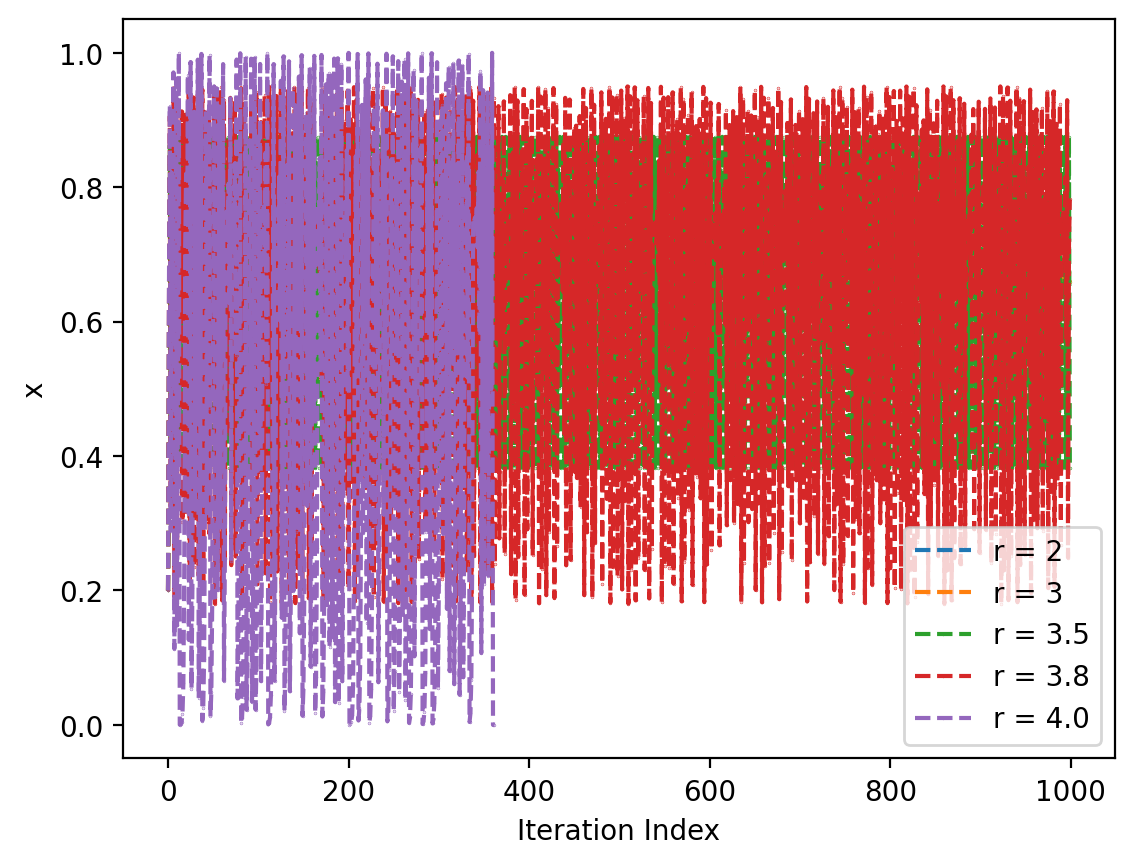

In [4]:
# Prob 1 (b)
import numpy as np

def evolution(x0,r,size=1000,convergence = 1e-6,log=1):
    result = np.zeros(size)
    result[0] = x0
    for i in range(size-1):
        x_i_1 = r*result[i]*(1 - result[i] )
        result[i+1] = x_i_1
        if np.abs(result[i+1]-result[i])<convergence:
            if log==1:
                print(f'For x0 = {x0}, r = {r}:\nConverged at x_{i+1}') 
            return result[:i+2]
    if log ==1:   
        print(f'For x0 = {x0}, r = {r}: \nMaximum iteration {size} has reached, yet the system still is not converged.') 
    return result

conv = 1e-6
plt.figure(dpi=200)
x0 = 0.2
rs = [2, 3, 3.5,3.8,4.0]
for r in rs:
    res = evolution(x0, r,convergence=conv)
    plt.plot(range(len(res)), res, '--o', label=f"r = {r}",markersize=0.2)

#plt.ylim(-conv,conv)
plt.xlabel("Iteration Index")
plt.ylabel("x")
plt.legend()
plt.show()

For x0 = 0.1, r = 2:
Converged at x_7
For x0 = 0.3, r = 2:
Converged at x_5
For x0 = 0.5, r = 2:
Converged at x_1
For x0 = 0.1, r = 3: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.3, r = 3: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.5, r = 3: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.1, r = 3.5: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.3, r = 3.5: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.5, r = 3.5: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.1, r = 3.8: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.3, r = 3.8: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.5, r = 3.8: 
Maximum iteration 1000 has reached, yet the system still is not converged.
F

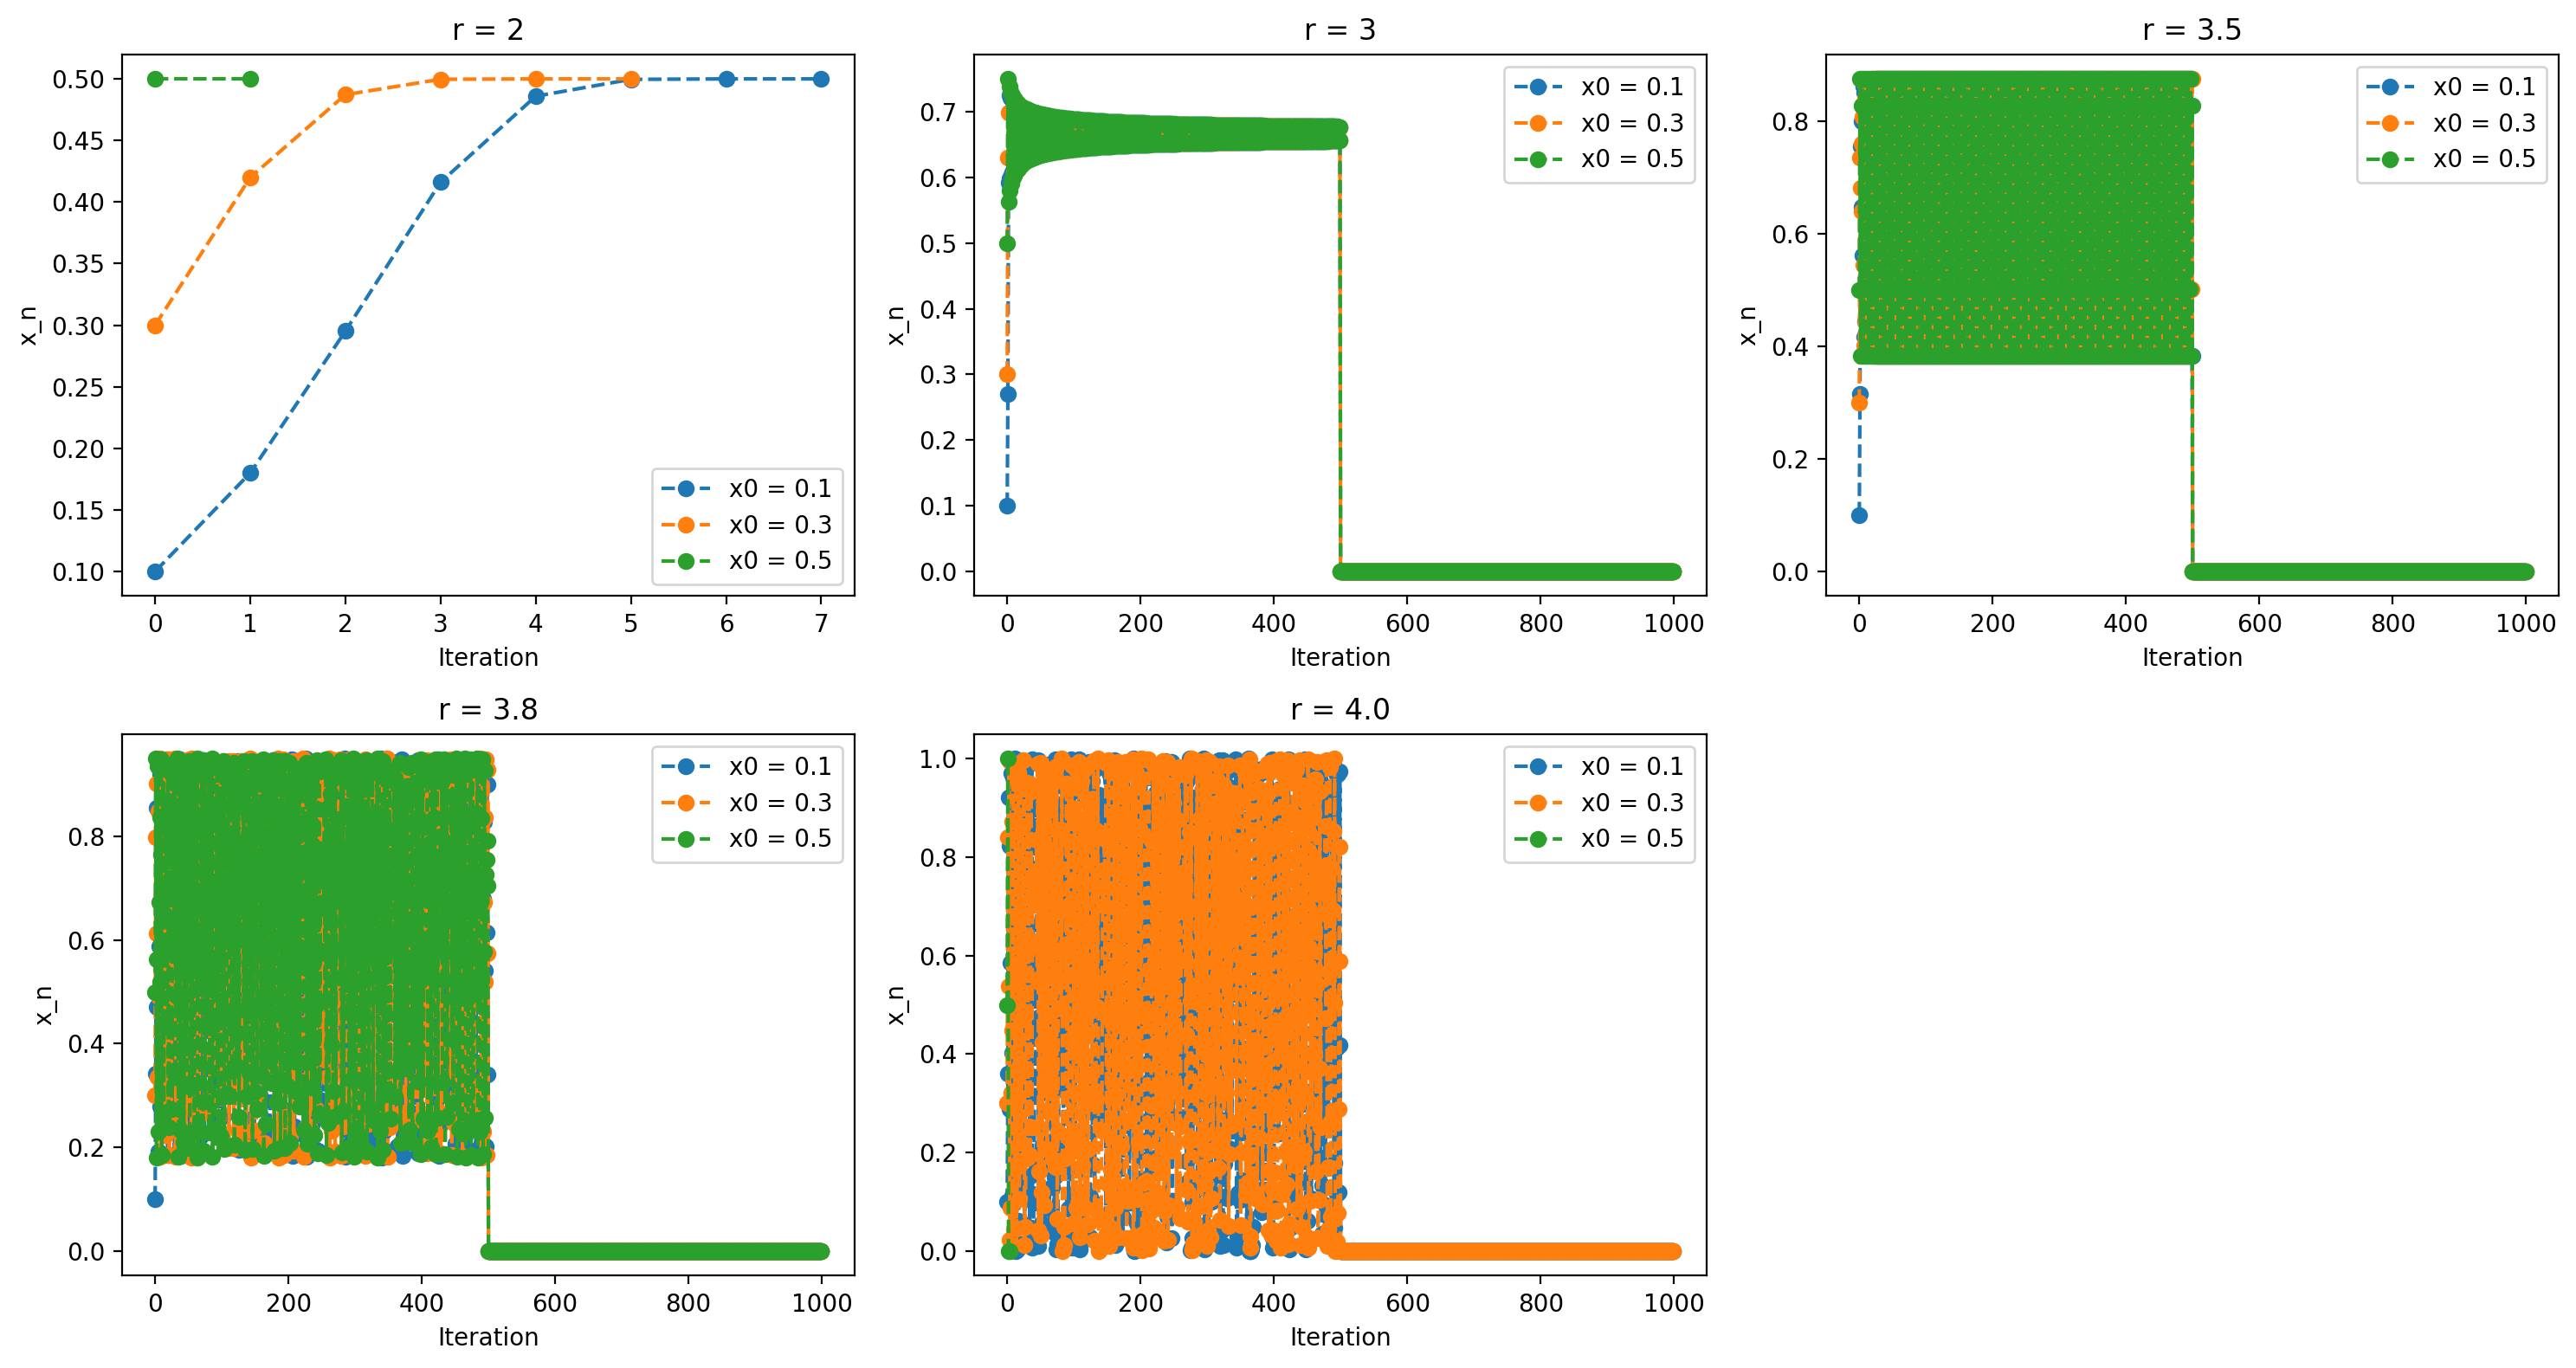

In [ ]:
# Prob 1 (c)
rs = [2, 3, 3.5, 3.8, 4.0]
initial_conditions = [0.1, 0.3, 0.5]

fig, axes = plt.subplots(2, 3, figsize=(15, 8), dpi=200)
axes = axes.flatten()  
for i, r in enumerate(rs):
    ax = axes[i]
    for x0 in initial_conditions:
        res = evolution(x0, r)
        ax.plot(range(len(res)), res, '--o', label=f"x0 = {x0}")
    ax.set_title(f"r = {r}")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("x_n")
    ax.legend()

if len(rs) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

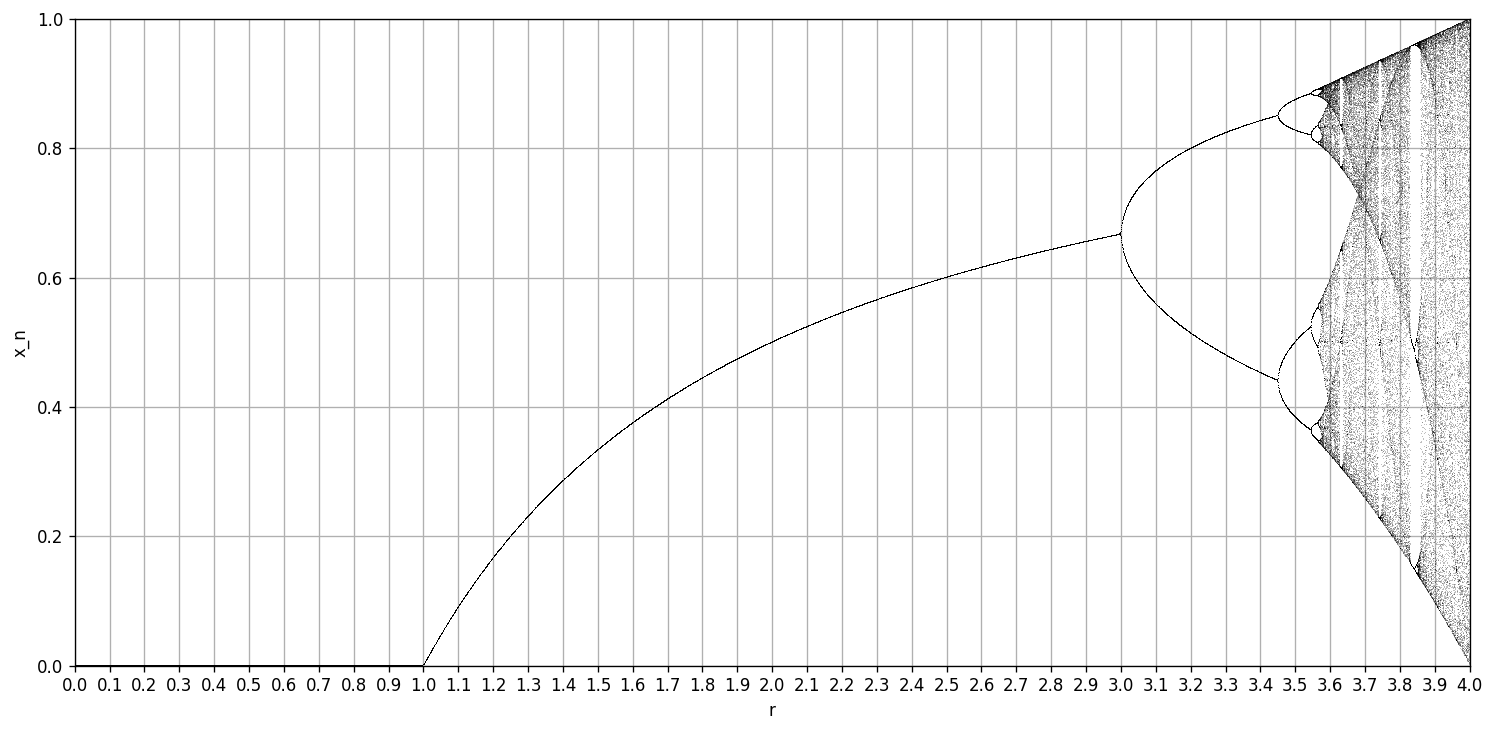

Using my eyes I know:
r1: 1
r2: 3
r3: 3
r4: 3.5
r5: 3.55
r6: 3.7
r7: 3.85
r8: 3.9


In [128]:
# Prob 1 (d)
r_min = 0.0          
r_max = 4.0          
num_r = 5000        

iterations = 1000    
transients = 900    

r_values = np.linspace(r_min, r_max, num_r)

r_list = []
x_list = []

for r in r_values:
    x = 0.2  
    for i in range(iterations):
        x = r * x * (1 - x)
        if i >= transients:
            r_list.append(r)
            x_list.append(x)

plt.figure(figsize=(15, 7),dpi=120)
plt.plot(r_list, x_list, ',k', alpha=0.25)  
plt.xlabel("r")
plt.ylabel("x_n")
plt.xlim(r_min, r_max)
plt.ylim(0, 1)
plt.grid(1)
plt.xticks(np.arange(0, 4.1, 0.1))

plt.show()

# Using my eyes I know:
print("Using my eyes I know:")
print(f"r1: {1}")
print(f"r2: {3}")
print(f"r3: {3}")
print(f"r4: {3.5}")
print(f"r5: {3.55}")
print(f"r6: {3.7}")
print(f"r7: {3.85}")
print(f"r8: {3.9}")


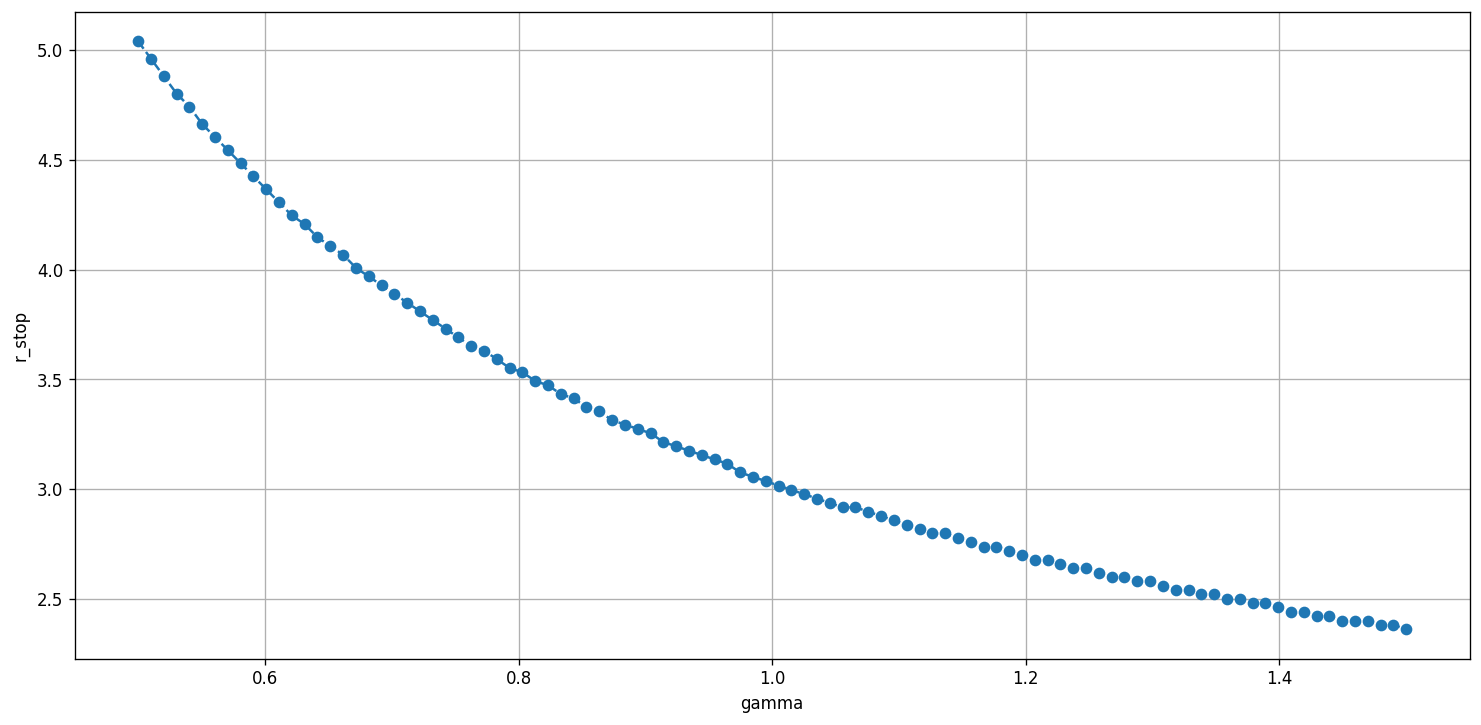

In [42]:
# Prob 1(e)
x0 = 0.2
r_list = np.linspace(0.1, 10, 500) 
gamma_vals = np.linspace(0.5,1.5,100)
sim_length = 100
transient = 90
threshold = 0.05

r_stop = np.zeros(len(gamma_vals))

for j, g in enumerate(gamma_vals):
    found_bifurcation = False
    for r in r_list:
        x = x0  
        temp = [] 
        evolve = lambda x_: r * x_ * (1 - x_**g)
        for i in range(sim_length):
            x = evolve(x)
            if i >= transient:
                temp.append(x)

        if np.std(temp) > threshold:
            r_stop[j] = r
            found_bifurcation = True
            break
    if not found_bifurcation:
        r_stop[j] = np.nan  

             
plt.figure(figsize=(15, 7),dpi=120)

plt.plot(gamma_vals, r_stop, '--o')  
plt.xlabel("gamma")
plt.ylabel("r_stop")

plt.grid(1)


# Prob 2 Julia

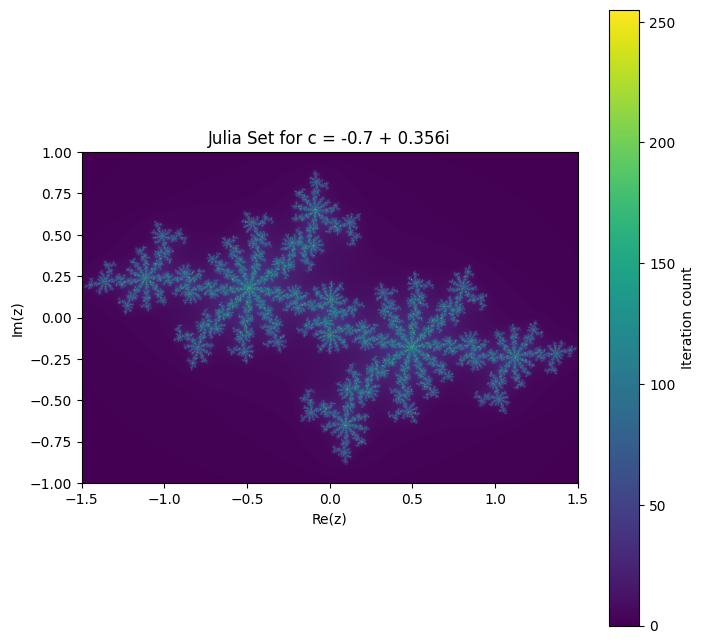

In [5]:
# 2(a)
width, height = 800, 800
xmin, xmax = -1.5, 1.5
ymin, ymax = -1, 1
max_iter = 256
c = -0.7 + 0.356j

x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

julia = np.zeros(Z.shape, dtype=int)

mask = np.ones(Z.shape, dtype=bool)

for i in range(max_iter):
    Z[mask] = Z[mask]**2 + c
    
    escaped = np.abs(Z) > 2
    
    newly_escaped = escaped & mask
    
    julia[newly_escaped] = i
    
    mask[newly_escaped] = False

plt.figure(figsize=(8, 8))
plt.imshow(julia, extent=(xmin, xmax, ymin, ymax), cmap="viridis", origin='lower')
plt.colorbar(label="Iteration count")
plt.title("Julia Set for c = -0.7 + 0.356i")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.show()


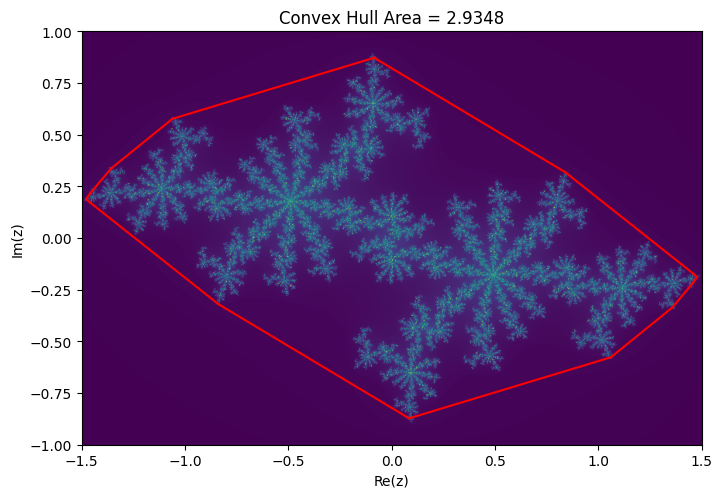

In [6]:
# 2 b 
width, height = 800, 800
xmin, xmax = -1.5, 1.5
ymin, ymax = -1, 1
max_iter = 128
c = -0.7 + 0.356j  

x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

mask = np.ones(Z.shape, dtype=bool)

for i in range(max_iter):
    Z[mask] = Z[mask]**2 + c
    mask[np.abs(Z) > 7] = False


#julia = mask.astype(float)

indices = np.where(mask)
points = np.column_stack((X[indices], Y[indices]))
hull = ConvexHull(points)
hull_area = hull.volume

plt.figure(figsize=(8, 8))
plt.imshow(julia, extent=(xmin, xmax, ymin, ymax), cmap="viridis", origin='lower')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-', lw=1.5)
plt.title(f"Convex Hull Area = {hull_area:.4f}")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.show()


Area enclosed by the contour (filled region): 0.0799


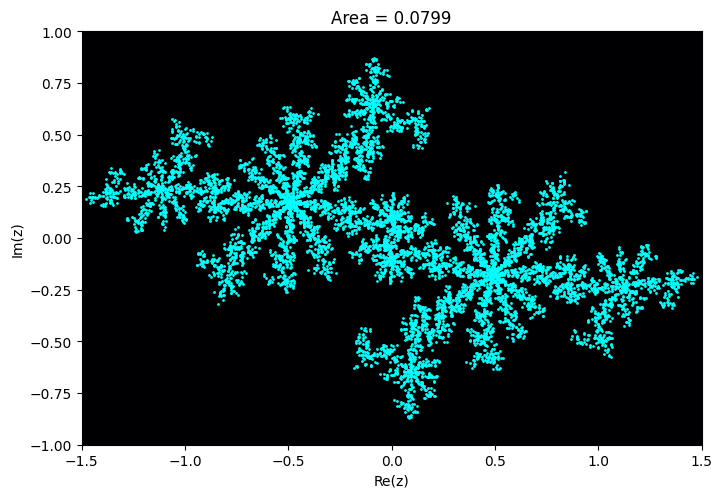

In [10]:
# 2c 
from skimage.morphology import binary_erosion
width, height = 800, 800
xmin, xmax = -1.5, 1.5
ymin, ymax = -1, 1
max_iter = 128
c = -0.7 + 0.356j  

x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

mask = np.ones(Z.shape, dtype=bool)
for i in range(max_iter):
    Z[mask] = Z[mask]**2 + c
    mask[np.abs(Z) > 7] = False

pixels_bool = mask


eroded = binary_erosion(pixels_bool)
boundary = pixels_bool & ~eroded


pixel_area = (xmax - xmin) * (ymax - ymin) / (width * height)
filled_area = np.sum(pixels_bool) * pixel_area

print(f"Area enclosed by the contour (filled region): {filled_area:.4f}")

plt.figure(figsize=(8,8))
plt.imshow(boundary.astype(float), extent=(xmin, xmax, ymin, ymax),
           cmap='inferno', origin='lower')
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title(f"Area = {filled_area:.4f}")
boundary_indices = np.where(boundary)
plt.scatter(X[boundary_indices], Y[boundary_indices], color='cyan', s=1)
plt.show()

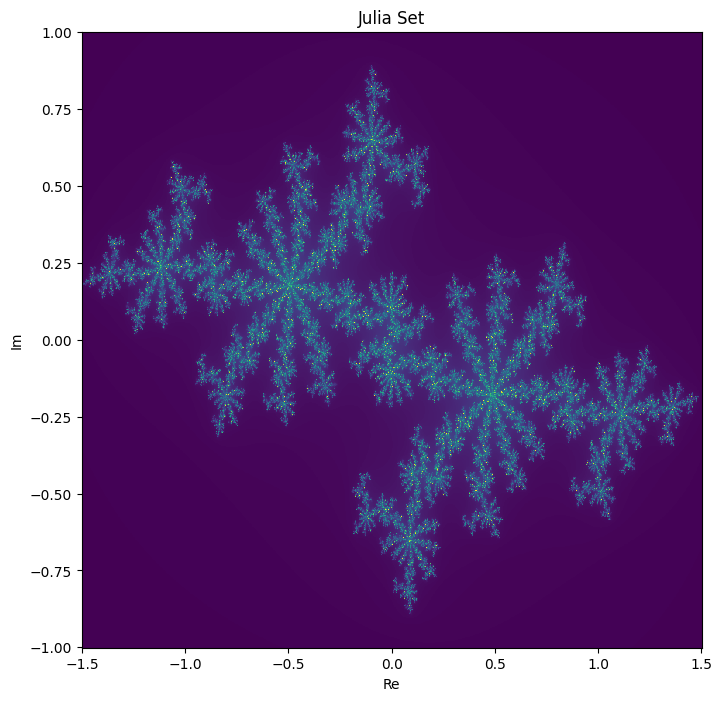

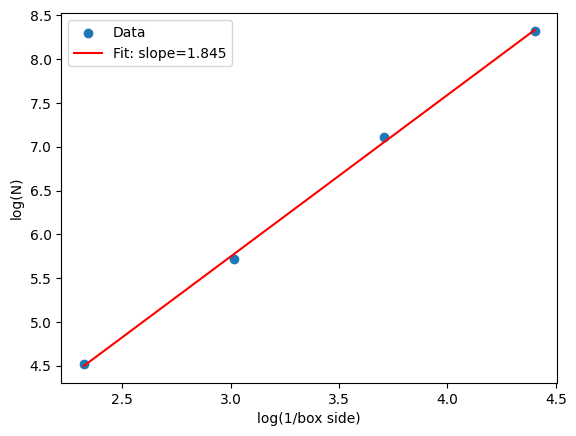

Estimated fractal dimension: 1.8446713449790215


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.spatial import ConvexHull

def julia_set_pixel(z, c, max_iter, r):
    z_val = z
    for i in range(max_iter):
        if abs(z_val) > r:
            return i
        z_val = z_val**2 + c
    return max_iter
julia_set_pixel = np.vectorize(julia_set_pixel)

xmin, xmax = -1.5, 1.5
ymin, ymax = -1, 1
width, height = 800, 800
re_vals = np.linspace(xmin, xmax, width)
im_vals = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(re_vals, im_vals)
Z = X + 1j * Y
c = -0.7 + 0.356j
max_iter = 256
escape_radius = 2

pixels = julia_set_pixel(Z, c, max_iter, escape_radius)
plt.figure(figsize=(8,8))
plt.pcolor(X, Y, pixels, cmap='viridis')
plt.xlabel('Re')
plt.ylabel('Im')
plt.title("Julia Set")
plt.show()

julia_threshold = max_iter / 2
pixels_bool = pixels > julia_threshold

def scale_down(arr, b):
    m, n = arr.shape
    if arr.dtype == bool:
        return arr.reshape(m // b, b, n // b, b).any(axis=(1, 3))
    else:
        return arr.reshape(m // b, b, n // b, b).mean(axis=(1, 3))

def pixels_boundary(arr):
    up = np.roll(arr, 1, axis=0)
    down = np.roll(arr, -1, axis=0)
    left = np.roll(arr, 1, axis=1)
    right = np.roll(arr, -1, axis=1)
    return arr & ~(up & down & left & right)

# Box-counting on the contour extracted from the downsampled Julia set mask
b_values = np.array([ 32,16, 8, 4])
box_area = (xmax - xmin) * (ymax - ymin) / ((width / b_values) * (height / b_values))
num_boxes = np.array([np.sum(pixels_boundary(scale_down(pixels_bool, b))) for b in b_values])
epsilon = np.sqrt(box_area)
inv_epsilon = 1.0 / epsilon

log_inv_epsilon = np.log(inv_epsilon)
log_N = np.log(num_boxes)
slope, intercept, r_value, p_value, std_err = linregress(log_inv_epsilon, log_N)
dimension = slope

plt.figure()
plt.scatter(log_inv_epsilon, log_N, label="Data")
plt.plot(log_inv_epsilon, intercept + slope * log_inv_epsilon, 'r-', label=f"Fit: slope={slope:.3f}")
plt.xlabel("log(1/box side)")
plt.ylabel("log(N)")
plt.legend()
plt.show()

print("Estimated fractal dimension:", dimension)


# Prob 3

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
plt.style.use('seaborn-v0_8-colorblind')

In [63]:
# (a)

# This model was developed by Edward Lorenz to describe convection at first. 
# It is later evolved to describe other systems such as laser

# For a single mode laser system, the laser's E field amplitude, population inversion gain, 
# and other cavity-related parameters could follow this equation. 
# The laser system also exhibits instabilities, bifurcations, and detemrinistic chaos. 
# x -- laser intensity
# y -- extent of population inversion
# z saturable absorber state
# sigma: cavity loss rate
# rho: coupling between intensity gain and absorber response
# beta: pumping strength

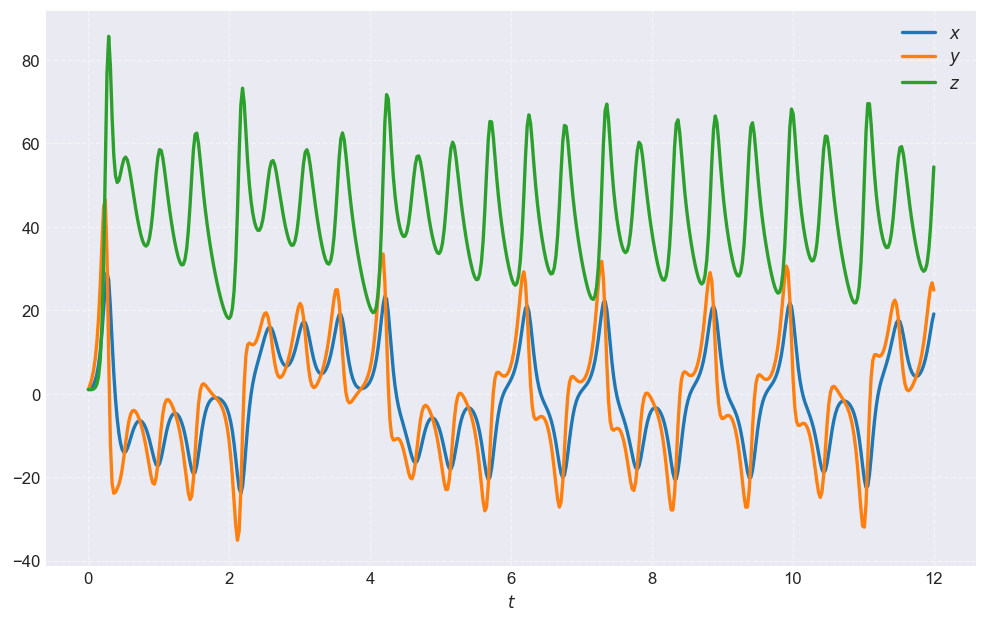

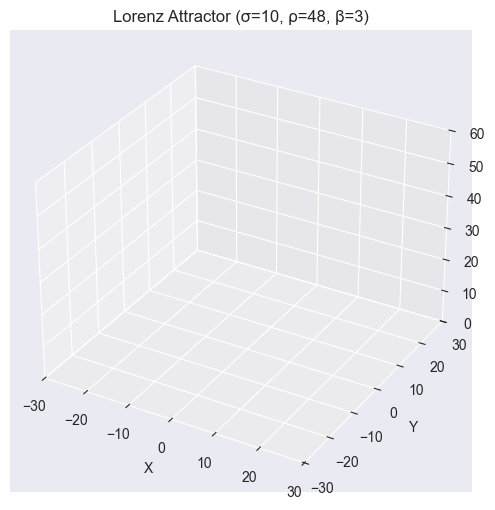

In [65]:
# (b)
def lorenz(state, t, sigma, rho, beta):
    x, y, z = state
    return [sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z]

sigma = 10.0
rho = 48.0
beta = 3.0
t = np.linspace(0, 12, 500)
initial_state = [1,1,1]

# Solve the Lorenz equations
sol = odeint(lorenz, initial_state, t, args=(sigma, rho, beta))


x = sol[:, 0]
y = sol[:, 1]
z = sol[:, 2]
plt.figure(figsize=(10, 6),dpi=120)

colors = plt.get_cmap('tab10')

plt.plot(t, x, label='$x$', color=colors(0), linewidth=2)
plt.plot(t, y, label='$y$', color=colors(1), linewidth=2)
plt.plot(t, z, label='$z$', color=colors(2), linewidth=2)

plt.xlabel('$t$')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # Light grid, optional
plt.show()



# (c)

# Set up a 3D plot for the Lorenz attractor
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor (σ=10, ρ=48, β=3)")
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(0, 60)
line, = ax.plot([], [], [], lw=2)
point, = ax.plot([], [], [], 'ro')

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def update(frame):
    line.set_data(sol[:frame, 0], sol[:frame, 1])
    line.set_3d_properties(sol[:frame, 2])
    point.set_data(sol[frame-1:frame, 0], sol[frame-1:frame, 1])
    point.set_3d_properties(sol[frame-1:frame, 2])
    return line, point

ani = FuncAnimation(fig, update, frames=np.arange(0, len(t), 2), init_func=init, interval=20)
plt.show()

ani.save("lorenz_attractor.gif", writer=PillowWriter(fps=120))
